# PART-2

In [8]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/107.7 GB disk)


## Loading the YOLOv8 pre-trained model

In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

model = YOLO("yolov8n.pt")

In [10]:
## my dataset path
%cd /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8

/content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8


In [11]:
# training my model on the dataset
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/data.yaml epochs=15 imgsz=224 plots=True

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

In [12]:
!ls runs/detect/train/

args.yaml					    R_curve.png       train_batch30.jpg
confusion_matrix.png				    results.csv       train_batch31.jpg
events.out.tfevents.1709176210.c04d7af44d38.8652.0  results.png       train_batch32.jpg
F1_curve.png					    train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch2.jpg  weights


### On my Training dataset

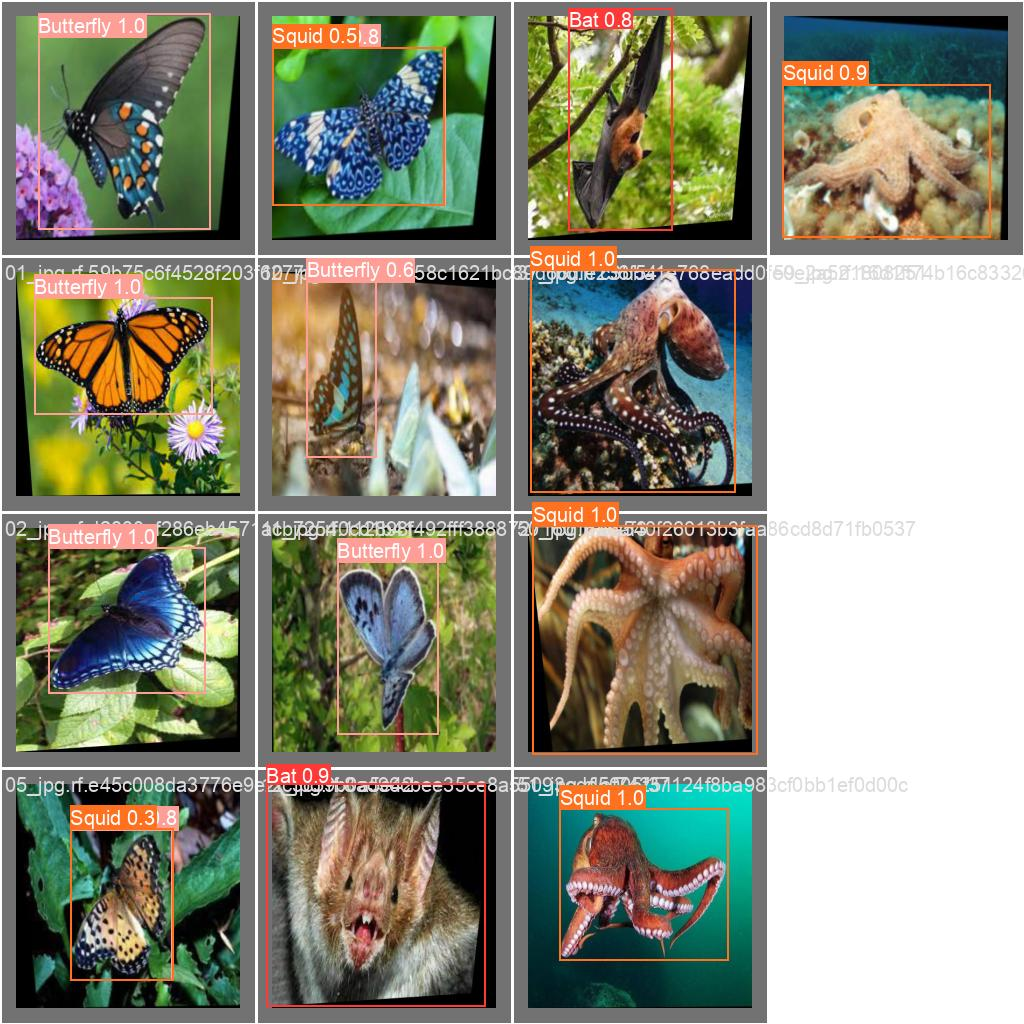

In [15]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## On my Validation dataset

In [16]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/data.yaml


Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/validation.cache... 9 images, 4 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.73s/it]
                   all         13          9       0.83          1      0.862       0.77
                   Bat         13          2      0.995          1      0.995      0.896
             Butterfly         13          3      0.556          1      0.597      0.519
                 Squid         13          4      0.938          1      0.995      0.895
Speed: 1.3ms preprocess, 265.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [17]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.5 source=/content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/10 /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test/01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg: 224x224 1 Butterfly, 99.5ms
image 2/10 /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test/05_jpg.rf.d36f18596bb39c3e04aecbfe0d78a160.jpg: 224x224 1 Butterfly, 91.2ms
image 3/10 /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test/06_jpg.rf.60cf19437b4fafb88f195a8643f43ec0.jpg: 224x224 (no detections), 98.6ms
image 4/10 /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test/06_jpg.rf.9abc3aebe26e2e12476cc5a64075928d.jpg: 224x224 (no detections), 88.0ms
image 5/10 /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test/12_jpg.rf.7fe04cfbc1aa8e687a48a0defabf5e2b.jpg: 224x224 1 Butterfly, 92.0ms
image 6/10 /content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test/34_jpg.rf.67fa217a5bcc5b76

## Prediction on Test dataset


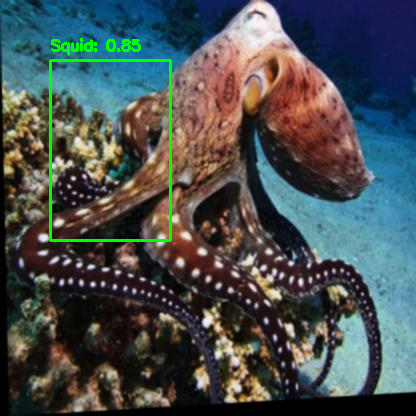

In [18]:
## Displaying one image from test dataset and checking whether it is correctly predicting or not
from google.colab.patches import cv2_imshow
import cv2

def visualize_detections(image_path, detections):
    # load any image from test dataset
    image = cv2.imread(image_path)

    for detection in detections:
        class_label = detection['class']
        confidence = detection['confidence']
        bbox = detection['bbox']

        x, y, w, h = bbox
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        text = f"{class_label}: {confidence:.2f}"
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2_imshow(image)

# Example:
image_path = '/content/drive/MyDrive/Squid_Bat_Butterfly.v2i.yolov8/test/50_jpg.rf.0a540f26013b3faa86cd8d71fb05378e.jpg'
detections = [
    {'class': 'Squid', 'confidence': 0.85, 'bbox': (50, 60, 120, 180)}
]

# Visualizing the image
visualize_detections(image_path, detections)
